# Problem

 Analyze customer purchase behavior, satisfaction, and loyalty scores, and
 use the data to develop a predictive **Classification** **model** for **Satisfaction Score.**

# Dataset Description



1.   Age : Age of the customer


2.  ItemsPurchased : Number of items purchased in a single transaction


3.  TotalSpent : Total amount spent on the transaction


4.  Discount(%) : Percentage discount on the purchase


5. Satisfaction Score : Self-reported customer satisfaction score
  

6. Warranty Extension : Whether the customer opted for warranty extension

7. Gender : Gender of the customer


8. Region : Customer's region

9. Product Category : Category of the purchased product
   

10. Payment Method : Payment method used (e.g.,UPI,Cash)
  

11. Revenue : Total revenue from the customer


12. Store Rating : Rating given by the customer to the store

13. Loyalty Score : Customer's loyalty score


14. Membership Status : Whether the customer isa  member
  

15.  Preferred Visit Time : Preferred time of visit   


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/Electronic - Electronic.csv.csv')

In [3]:
data.shape

(5000, 15)

Dataset has 5000 rows and 15 columns.

In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Items Purchased       5000 non-null   int64  
 2   Total Spent           5000 non-null   float64
 3   Discount (%)          5000 non-null   float64
 4   Satisfaction Score    5000 non-null   float64
 5   Warranty Extension    5000 non-null   int64  
 6   Gender                4998 non-null   object 
 7   Region                5000 non-null   object 
 8   Product Category      5000 non-null   object 
 9   Payment Method        4996 non-null   object 
 10  Revenue               5000 non-null   float64
 11  Store Rating          4997 non-null   float64
 12  Loyalty Score         5000 non-null   float64
 13  Membership Status     4994 non-null   float64
 14  Preferred Visit Time  4992 non-null   object 
dtypes: float64(7), int64(

In [5]:
data.head()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
0,56,1,29.226195,47.077380,1.000000,1,Male,South,Accessories,UPI,149.252145,3.660461,3.597133,1.0,Evening
1,69,10,420.142612,7.985739,3.760294,1,Female,South,Accessories,Cash,1485.524222,3.551553,25.764903,1.0,Evening
2,46,4,127.742817,37.225718,1.771240,1,Male,East,Laptop,Credit Card,85.550131,3.922839,7.022399,1.0,Morning
3,32,9,417.722683,8.227732,1.926831,0,Female,East,Tablet,UPI,824.118724,3.860422,7.635412,1.0,Afternoon
4,60,13,608.031366,5.000000,3.902927,0,Female,South,Tablet,UPI,2463.590392,3.812820,29.461119,0.0,Morning


In [6]:

data.describe()

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Revenue,Store Rating,Loyalty Score,Membership Status
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4997.000000,5000.000000,4994.000000
mean,43.584600,7.536600,243.721837,26.622330,2.650108,0.220400,717.998214,3.975184,15.638275,0.308370
std,14.919094,4.014858,154.949018,13.586725,1.533394,0.414558,776.789137,0.250691,9.144742,0.461867
min,18.000000,1.000000,15.105730,5.000000,1.000000,0.000000,-201.427094,3.076092,0.000000,0.000000
25%,31.000000,4.000000,119.130074,15.382663,1.000000,0.000000,164.697614,3.799761,7.944790,0.000000
50%,43.000000,7.000000,221.514206,27.848579,2.338884,0.000000,380.548500,3.969738,13.969791,0.000000
75%,56.000000,11.000000,346.173367,38.086993,4.129317,0.000000,1047.426498,4.149998,23.521601,1.000000
max,69.000000,14.000000,699.611576,48.489427,5.000000,1.000000,3523.469177,4.764298,39.235391,1.000000


In [7]:
df=data.copy()

# **Data cleaning**


In [8]:
df.duplicated().sum()

0

**Data Transformation**

In [9]:
for col in df.columns:
  print(f'Column : {col}')
  print(f'{df[col].unique()}\n\n')

Column : Age
[56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]


Column : Items Purchased
[ 1 10  4  9 13 14  6  2 11  3  5 12  8  7]


Column : Total Spent
[ 29.22619513 420.1426123  127.742817   ... 493.3881038  260.2695893
 366.613874  ]


Column : Discount (%)
[47.07738049  7.98573877 37.2257183  ... 32.75134618 23.97304107
 13.3386126 ]


Column : Satisfaction Score
[1.         3.76029424 1.7712403  ... 2.03438393 2.32478324 2.718373  ]


Column : Warranty Extension
[1 0]


Column : Gender
['Male' 'Female' 'Other' nan]


Column : Region
['South' 'East' 'North' 'West']


Column : Product Category
['Accessories' 'Laptop' 'Tablet' 'Television' 'Mobile']


Column : Payment Method
['UPI' 'Cash' 'Credit Card' 'Net Banking' 'Debit Card' nan]


Column : Revenue
[ 149.2521454  1485.524222     85.55013081 ... 1010.219124   1114.585926
  988.644957  ]


Column : Store Rating
[3.66046

In [10]:
df[['Total Spent','Revenue']]=df[['Total Spent','Revenue']].round(2)
df[['Total Spent','Revenue']]

,Total Spent,Revenue
0,29.23,149.25
1,420.14,1485.52
2,127.74,85.55
3,417.72,824.12
4,608.03,2463.59
...,...,...
4995,39.58,-64.46
4996,172.49,138.77
4997,493.39,1010.22
4998,260.27,1114.59


In [11]:
df[['Satisfaction Score','Loyalty Score','Discount (%)']]=df[['Satisfaction Score','Loyalty Score','Discount (%)']].round().astype(int)
df[['Satisfaction Score','Loyalty Score','Discount (%)']]

,Satisfaction Score,Loyalty Score,Discount (%)
0,1,4,47
1,4,26,8
2,2,7,37
3,2,8,8
4,4,29,5
...,...,...,...
4995,1,9,46
4996,1,2,33
4997,2,17,5
4998,5,26,24


Store rating has 3 missing values. Hence it can be transformed to an integer only after handling those missing values.

# Missing value handling

In [12]:

df.isnull().sum()

,0
Age,0
Items Purchased,0
Total Spent,0
Discount (%),0
Satisfaction Score,0
Warranty Extension,0
Gender,2
Region,0
Product Category,0
Payment Method,4


In [13]:
df.isnull().sum()/df.shape[0]*100

,0
Age,0.00
Items Purchased,0.00
Total Spent,0.00
Discount (%),0.00
Satisfaction Score,0.00
Warranty Extension,0.00
Gender,0.04
Region,0.00
Product Category,0.00
Payment Method,0.08


**Gender column**

In [14]:
df[df['Gender'].isnull()]

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
61,64,7,129.31,37,2,0,NaN,West,Accessories,Debit Card,264.69,3.790297,14,1.0,Evening
64,34,6,273.70,23,3,0,NaN,North,Laptop,NaN,482.04,3.922816,18,0.0,Evening


In [15]:

filtered_df = df.groupby(['Gender', 'Region', 'Age','Product Category','Preferred Visit Time']).size().reset_index(name='count')
filtered_df = filtered_df[((filtered_df['Region'] == 'North') & (filtered_df['Age'] == 34) & (filtered_df['Product Category']=='Laptop') & (filtered_df['Preferred Visit Time']== 'Evening') ) |
                          ((filtered_df['Region'] == 'West') & (filtered_df['Age'] == 64) & (filtered_df['Product Category']=='Accessories') & (filtered_df['Preferred Visit Time']== 'Evening'))]
filtered_df = filtered_df.sort_values(by='count', ascending=False)

print(filtered_df)

      Gender Region  Age Product Category Preferred Visit Time  count
1604  Female   West   64      Accessories              Evening      2
3285    Male   West   64      Accessories              Evening      2
528   Female  North   34           Laptop              Evening      1


In [16]:
filtered_df_64 = df.groupby(['Gender', 'Region', 'Age','Product Category','Preferred Visit Time','Membership Status']).size().reset_index(name='count')
filtered_df_64 = filtered_df_64[((filtered_df_64['Region'] == 'North') & (filtered_df_64['Age'] == 34) & (filtered_df_64['Product Category']=='Laptop') & (filtered_df_64['Preferred Visit Time']== 'Evening') ) & (filtered_df_64['Membership Status']== 1.0)]
filtered_df_64 = filtered_df_64.sort_values(by='count', ascending=False)

print(filtered_df_64)

     Gender Region  Age Product Category Preferred Visit Time  \
603  Female  North   34           Laptop              Evening   

     Membership Status  count  
603                1.0      1  


In [17]:
df['Gender']=df['Gender'].fillna('Female')

**Payment Method**

In [18]:
df[df['Payment Method'].isnull()]

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
64,34,6,273.70,23,3,0,Female,North,Laptop,NaN,482.04,3.922816,18,0.0,Evening
70,23,14,596.57,5,5,1,Male,North,Television,NaN,2864.03,4.113983,31,0.0,Evening
78,27,14,500.85,5,5,0,Male,North,Television,NaN,2141.09,4.217176,31,1.0,Afternoon
84,25,9,168.33,33,1,1,Female,West,Accessories,NaN,40.09,4.016955,9,0.0,Evening


In [19]:
print(df.groupby('Gender')['Payment Method'].value_counts())

Gender  Payment Method
Female  Cash              507
        Credit Card       499
        Net Banking       489
        Debit Card        443
        UPI               433
Male    Net Banking       506
        Debit Card        497
        Credit Card       487
        UPI               486
        Cash              468
Other   Net Banking        43
        Cash               40
        Debit Card         40
        UPI                33
        Credit Card        25
Name: count, dtype: int64


In [20]:
df['Payment Method'] = df.groupby('Gender')['Payment Method'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

**Preferred Visit Time**

In [21]:

df[df['Preferred Visit Time'].isnull()]

,Age,Items Purchased,Total Spent,Discount (%),Satisfaction Score,Warranty Extension,Gender,Region,Product Category,Payment Method,Revenue,Store Rating,Loyalty Score,Membership Status,Preferred Visit Time
153,43,4,158.34,34,4,1,Female,West,Laptop,Credit Card,380.65,4.004365,23,1.0,NaN
154,59,3,114.18,39,1,0,Female,East,Laptop,Net Banking,66.04,4.092343,10,0.0,NaN
155,30,3,148.86,35,1,1,Female,North,Television,Credit Card,75.61,4.164093,16,0.0,NaN
156,68,4,97.11,40,2,0,Female,East,Laptop,Credit Card,188.90,4.140653,12,0.0,NaN
239,43,12,349.06,15,4,0,Female,East,Accessories,Debit Card,1456.44,4.034198,23,0.0,NaN
264,36,3,57.74,44,1,0,Female,West,Tablet,Debit Card,37.32,3.862997,7,1.0,NaN
273,50,13,578.63,5,5,1,Female,North,Laptop,Net Banking,2894.23,4.279646,29,1.0,NaN
291,65,1,15.63,48,5,0,Male,West,Television,Debit Card,-22.08,4.097879,17,1.0,NaN


In [22]:
df['Age'].max()

69

In [23]:
bins = [0, 20, 30, 40, 50, 60, 70]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['Preferred Visit Time'] = df.groupby(['Gender', 'Age Group', 'Region'])['Preferred Visit Time'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
)

# print(df['Preferred Visit Time'].value_counts())

<ipython-input-23-823f23ff63e1>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['Preferred Visit Time'] = df.groupby(['Gender', 'Age Group', 'Region'])['Preferred Visit Time'].transform(


**Membership Status**

In [24]:
df['Membership Status'] = df.groupby(['Total Spent', 'Satisfaction Score'])['Membership Status'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0)
)



> Missing values were imputed **by filling** them with **values from similar rows** or by **using related feature columns**. When similar rows were unavailable, we leveraged most probable correlated features to ensure the imputed values aligned with the data's underlying patterns, preserving its integrity for model training.

**Store Rating**

In [25]:
df['Store Rating'].value_counts()

,count
Store Rating,
3.660461,1
3.830208,1
4.117015,1
3.992429,1
4.136217,1
...,...
4.306212,1
3.734861,1
3.999939,1


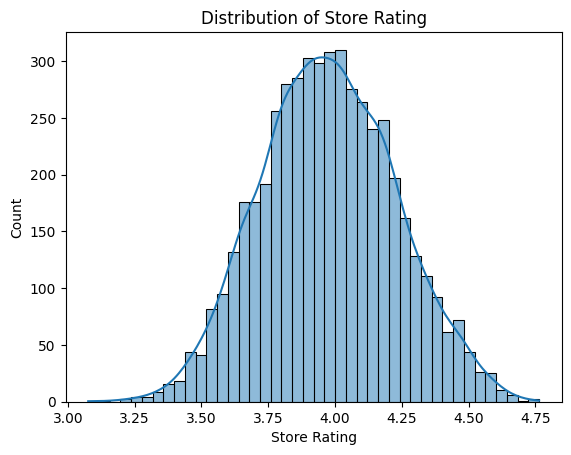

In [26]:
sns.histplot(df['Store Rating'], kde=True)
plt.title('Distribution of Store Rating')
plt.show()

In [27]:
df['Store Rating']=df['Store Rating'].fillna(df['Store Rating'].mean())

In [28]:
df.isnull().sum().sum()

0



>Missing values in the "Store Rating" column were **imputed with the mean value**, as the column follows a **continuous uniform distribution.** In a uniform distribution, all values within the range are equally likely, making the mean a suitable choice for imputation.



**Distribution of Values For Satisfaction and Loyalty Scores.**

In [29]:
df['Satisfaction Score'].value_counts().sort_index()

,count
Satisfaction Score,
1,1818
2,798
3,754
4,605
5,1025


In [30]:
df['Satisfaction Score'].value_counts(normalize=True).sort_index()

,proportion
Satisfaction Score,
1,0.3636
2,0.1596
3,0.1508
4,0.1210
5,0.2050




> There is a **slight imbalance** in the **target** column, meaning one class has a slightly higher number of instances than the other. While the distribution is not highly skewed, this small imbalance can still influence the model's ability to predict classes accurately.



In [31]:
df['Loyalty Score'].value_counts().sort_index()

,count
Loyalty Score,
0,56
1,40
2,92
3,107
4,177
5,184
6,226
7,269
8,241


In [32]:
df['Store Rating']=df['Store Rating'].round().astype(int)
df['Store Rating'].value_counts().sort_index()

,count
Store Rating,
3,127
4,4782
5,91


# EDA

In [33]:
single_value_columns = [col for col in df.columns if df[col].nunique() == 1]

if single_value_columns:
    print("Columns with only one unique value:", single_value_columns)
else:
    print("No columns with only one unique value found.")

No columns with only one unique value found.


In [34]:
proportion_unique = {col: df[col].nunique() / df.shape[0] for col in df.columns}
proportion_unique

{'Age': 0.0104,
 'Items Purchased': 0.0028,
 'Total Spent': 0.9508,
 'Discount (%)': 0.0088,
 'Satisfaction Score': 0.001,
 'Warranty Extension': 0.0004,
 'Gender': 0.0006,
 'Region': 0.0008,
 'Product Category': 0.001,
 'Payment Method': 0.001,
 'Revenue': 0.9784,
 'Store Rating': 0.0006,
 'Loyalty Score': 0.008,
 'Membership Status': 0.0004,
 'Preferred Visit Time': 0.0006,
 'Age Group': 0.0012}



*  'Revenue' column is composed of 97% of unique values.

*  Column 'Total Spent' has 95% of unique values.

*  All other columns are of recurring values.







In [35]:
cat_df = df.select_dtypes(include='object')
cat_df.columns

Index(['Gender', 'Region', 'Product Category', 'Payment Method',
       'Preferred Visit Time'],
      dtype='object')

In [36]:
df['Age Group'].value_counts()

,count
Age Group,
51-60,990
41-50,972
31-40,951
61-70,951
21-30,946
0-20,190


In [37]:
cat_df.nunique()

,0
Gender,3
Region,4
Product Category,5
Payment Method,5
Preferred Visit Time,3


In [38]:
for col in cat_df.columns:
  print(f'\n{cat_df[col].value_counts()}')


Gender
Male      2446
Female    2373
Other      181
Name: count, dtype: int64

Region
South    1310
West     1281
East     1208
North    1201
Name: count, dtype: int64

Product Category
Accessories    1015
Laptop         1013
Tablet          997
Television      991
Mobile          984
Name: count, dtype: int64

Payment Method
Net Banking    1040
Cash           1017
Credit Card    1011
Debit Card      980
UPI             952
Name: count, dtype: int64

Preferred Visit Time
Morning      1675
Evening      1665
Afternoon    1660
Name: count, dtype: int64




>No transformations are needed for the entries in categorical columns.



In [39]:
num_df = df.select_dtypes(include='number')
num_df.columns

Index(['Age', 'Items Purchased', 'Total Spent', 'Discount (%)',
       'Satisfaction Score', 'Warranty Extension', 'Revenue', 'Store Rating',
       'Loyalty Score', 'Membership Status'],
      dtype='object')

In [40]:
for col in num_df.columns:
  print(f'\n{num_df[col].value_counts()}')


Age
66    118
64    118
52    114
43    112
25    110
38    109
54    109
62    109
45    108
51    106
34    105
68    104
46    104
39    104
42    104
50    103
21    103
58    102
53    101
49    101
40    100
61     99
41     99
28     98
29     97
19     97
37     97
23     97
22     95
20     95
57     95
47     95
56     94
36     94
18     93
30     92
31     91
32     91
35     90
26     89
27     88
55     88
69     87
67     84
63     81
44     80
65     79
59     78
33     78
24     74
60     72
48     69
Name: count, dtype: int64

Items Purchased
10    405
13    396
7     386
6     383
2     363
11    348
3     347
1     346
12    346
4     345
9     336
5     334
14    333
8     332
Name: count, dtype: int64

Total Spent
255.97    3
91.23     3
280.24    3
191.42    3
16.82     3
         ..
84.45     1
357.64    1
302.64    1
222.39    1
366.61    1
Name: count, Length: 4754, dtype: int64

Discount (%)
5     610
41    153
47    142
35    133
46    132
36    132
37    1

In [41]:
satisfaction_counts = df['Satisfaction Score'].value_counts(normalize=True).sort_index()
satisfaction_counts

,proportion
Satisfaction Score,
1,0.3636
2,0.1596
3,0.1508
4,0.1210
5,0.2050




> There exist slight class imbalance in the target column.



# Pie plots

> **analysing the distribution of Satisfaction score, Loyalty score and Preferred visit time.**






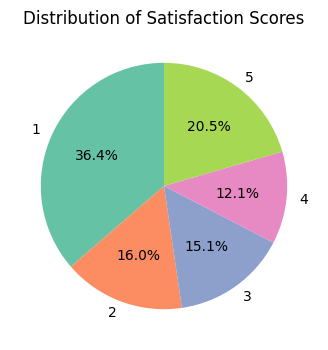

In [42]:
# Pie plot for Satisfaction score

plt.figure(figsize=(4,4))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(satisfaction_counts)))
plt.title('Distribution of Satisfaction Scores')
plt.show()



> Most recurring of all Satisfaction score is 1 and the least is 4.


> There exist class imbalance.







In [43]:
loyalty_counts = df['Loyalty Score'].value_counts()
loyalty_counts

,count
Loyalty Score,
7,269
9,258
8,241
6,226
10,222
11,197
12,188
5,184
13,178


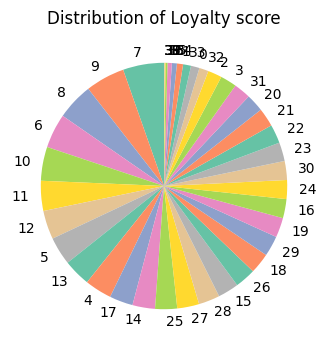

In [44]:
plt.figure(figsize=(4,4))
plt.pie(loyalty_counts, labels=loyalty_counts.index, startangle=90, colors=sns.color_palette("Set2", len(loyalty_counts)))
plt.title('Distribution of Loyalty score')
plt.show()



> Scores that range between 4 and 14 constitute around half the total, where 7 being the most recurring Loyalty Score.



In [45]:
visit_counts = df['Preferred Visit Time'].value_counts()
visit_counts

,count
Preferred Visit Time,
Morning,1675
Evening,1665
Afternoon,1660


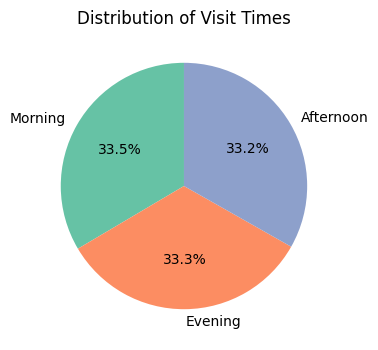

In [46]:
# Pie plot for Visit Times

plt.figure(figsize=(4,4))
plt.pie(visit_counts, labels=visit_counts.index, autopct='%1.1f%%', startangle=90 ,colors=sns.color_palette("Set2"))
plt.title('Distribution of Visit Times')
plt.show()



> No distict trends are visible for visit times.



# Scatter plots

<Figure size 1200x600 with 0 Axes>

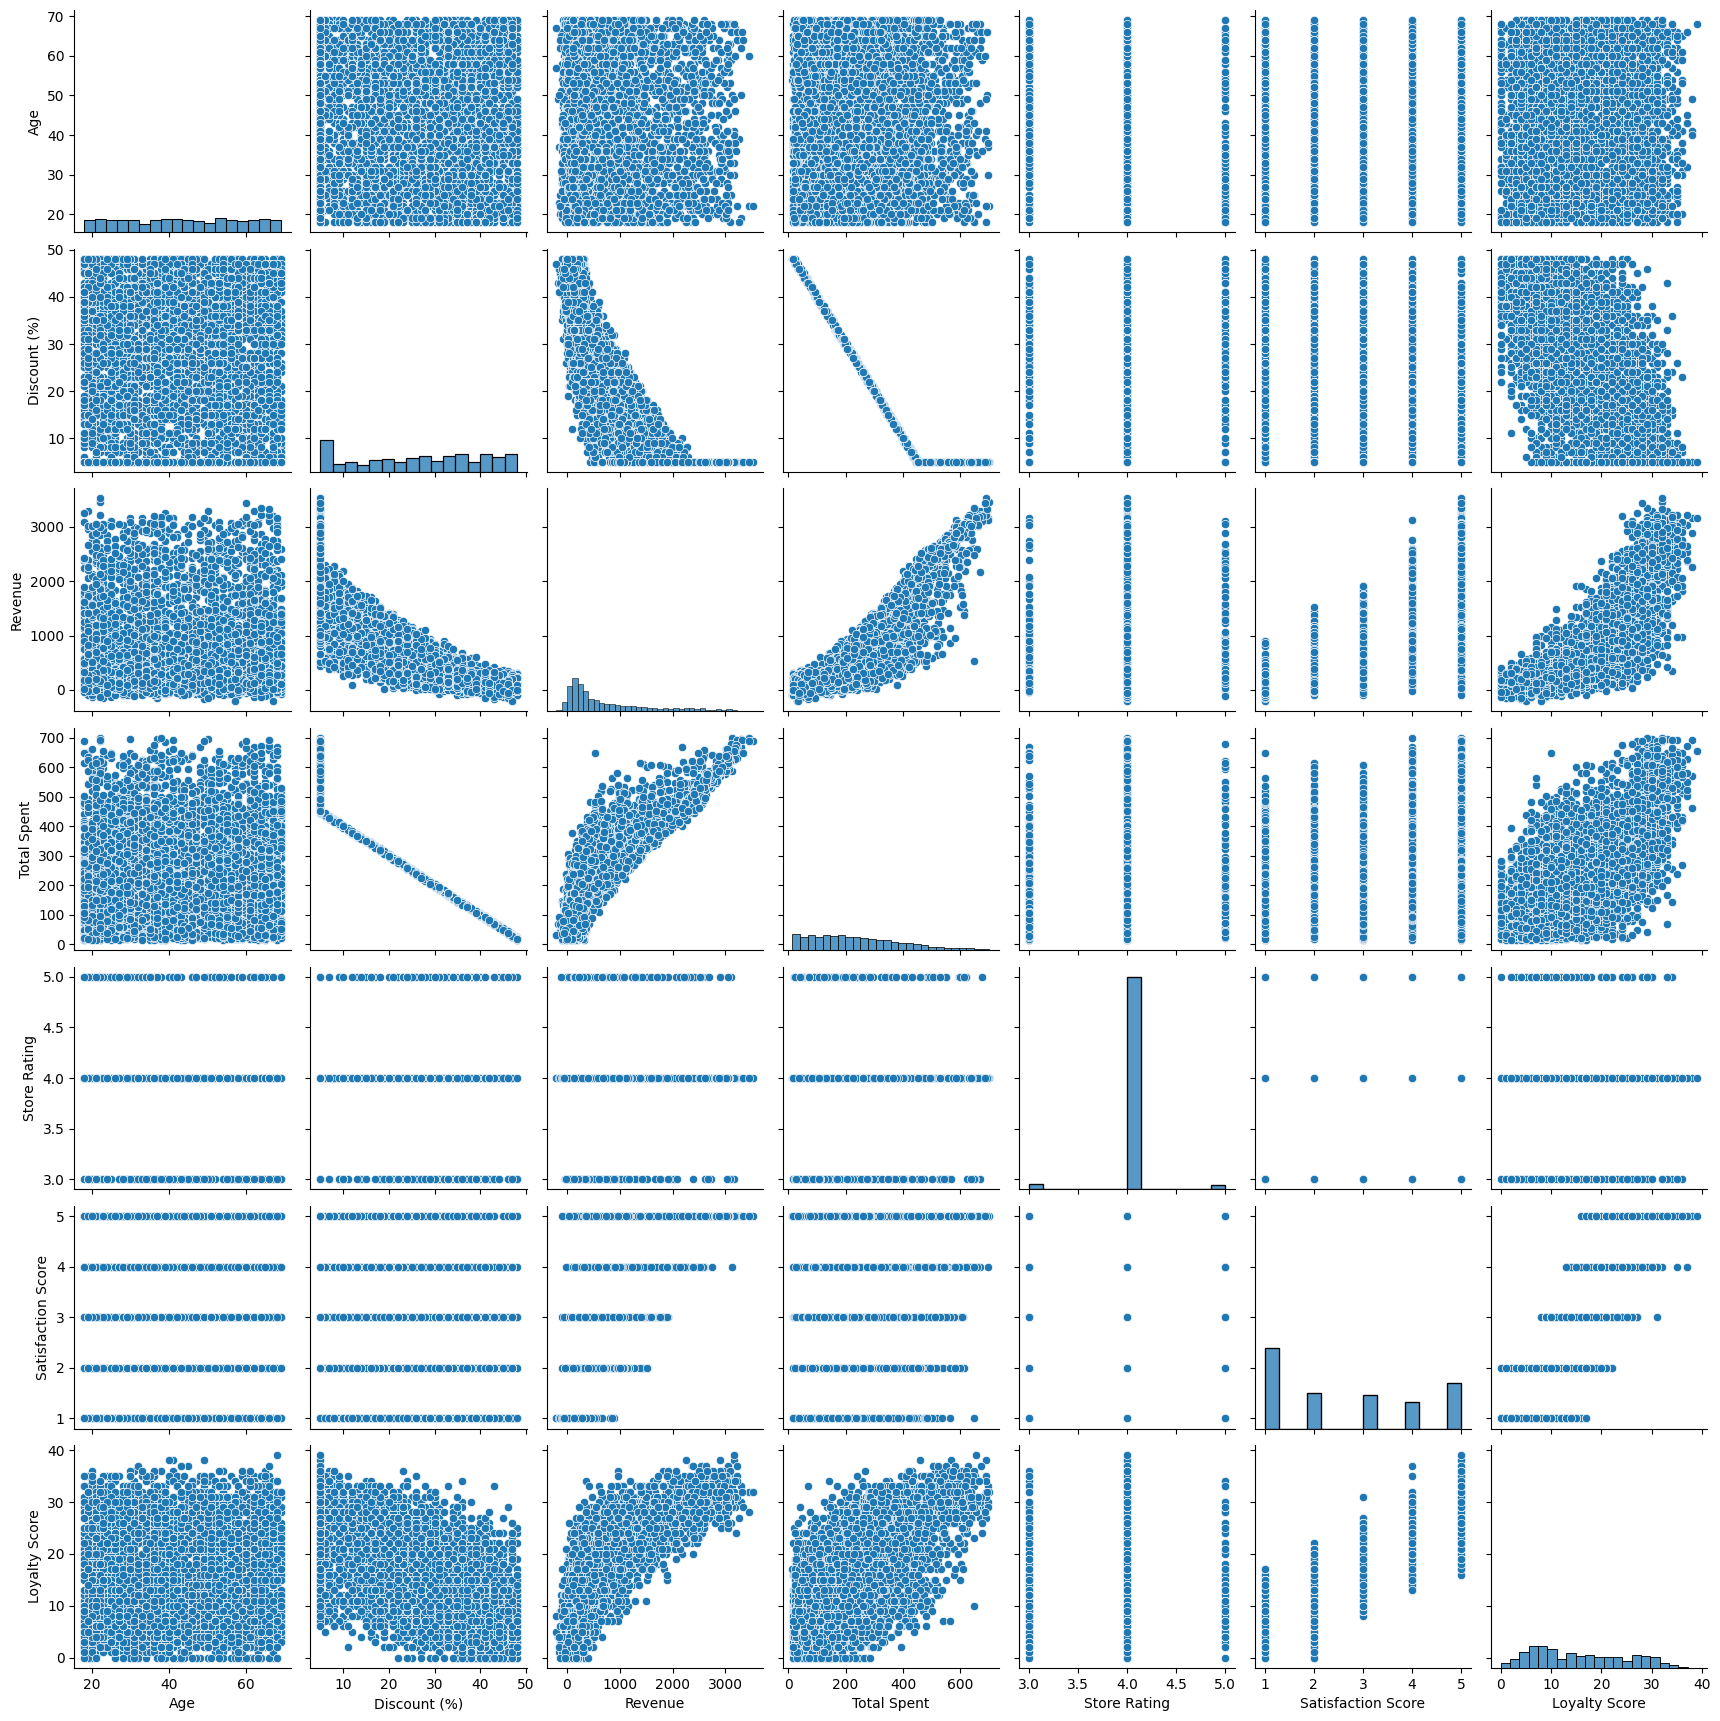

In [47]:
plt.figure(figsize=(12, 6))
sns.pairplot(df[['Age', 'Discount (%)', 'Revenue', 'Total Spent','Store Rating', 'Satisfaction Score', 'Loyalty Score']])
plt.show()



*   **Discount** has  a strong negative linear relationship with **Total spent**. In other words, higher the discount, lower the total spent amount.

*  **Discount** and **revenue** have a linear relationship. That is, lowest discount percentage yields the highest revenue.

*   **Revenue** and **total spend** have a linear ralationship.That means, as total spent increases revenue also increases.

*   High **satisfaction scores** corresponds to high **revenue**.

*   **Highly satisfied** customers tend to be **more loyal** as higher satisfactions scores corresponds to high loyalty scores.





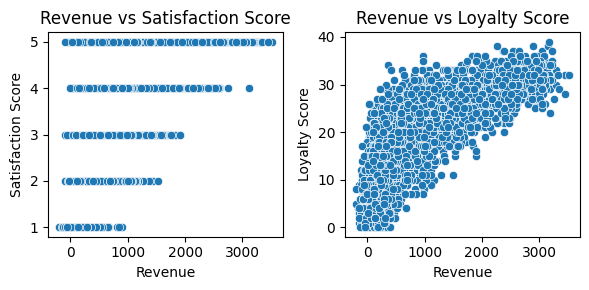

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Scatter Plot: "Revenue" vs "Satisfaction Score"
sns.scatterplot(x='Revenue', y='Satisfaction Score', data=df, ax=axes[0])
axes[0].set_title('Revenue vs Satisfaction Score')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Satisfaction Score')

# Scatter Plot: "Revenue" vs "Loyalty Score"
sns.scatterplot(x='Revenue', y='Loyalty Score', data=df, ax=axes[1])
axes[1].set_title('Revenue vs Loyalty Score')
axes[1].set_xlabel('Revenue')
axes[1].set_ylabel('Loyalty Score')

plt.tight_layout()
plt.show()



>    **Low revenue** corresponds with **low satisfaction and loyalty scores** and higher revenue customers seem more satisfied and loyal.



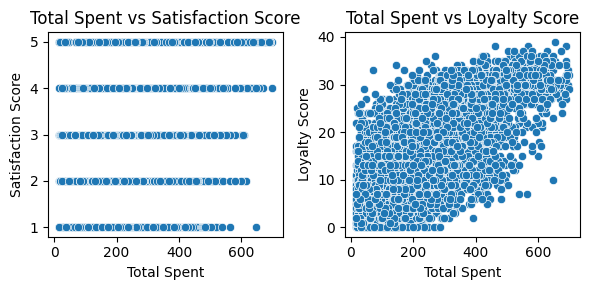

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Scatter Plot: "Total Spent" vs "Satisfaction Score"
sns.scatterplot(x='Total Spent', y='Satisfaction Score', data=df, ax=axes[0])
axes[0].set_title('Total Spent vs Satisfaction Score')
axes[0].set_xlabel('Total Spent')
axes[0].set_ylabel('Satisfaction Score')

# Scatter Plot: "Total Spend" vs "Loyalty Score"
sns.scatterplot(x='Total Spent', y='Loyalty Score', data=df, ax=axes[1])
axes[1].set_title('Total Spent vs Loyalty Score')
axes[1].set_xlabel('Total Spent')
axes[1].set_ylabel('Loyalty Score')

plt.tight_layout()
plt.show()



> Total spent has a mild linear relationship with loyalty score.



# Bar plots

<ipython-input-50-edd089b5dba8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Items Purchased', y='Satisfaction Score', data=df, palette=palette)
<ipython-input-50-edd089b5dba8>:5: UserWarning: The palette list has more values (5000) than needed (14), which may not be intended.
  sns.barplot(x='Items Purchased', y='Satisfaction Score', data=df, palette=palette)


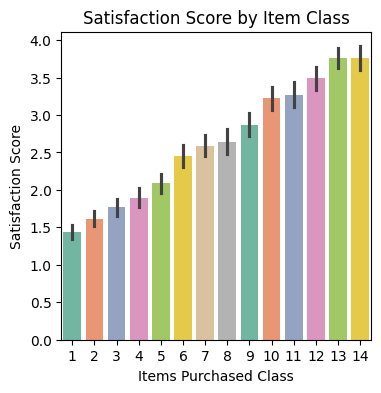

In [50]:
#Bar plot showing relationship of items purchased and Satisfaction scores

palette = sns.color_palette("Set2", len(df))
plt.figure(figsize=(4,4))
sns.barplot(x='Items Purchased', y='Satisfaction Score', data=df, palette=palette)

plt.title('Satisfaction Score by Item Class')
plt.xlabel('Items Purchased Class')
plt.ylabel('Satisfaction Score')
plt.show()



> As number of **items purchased** increase, **Satisfaction score**  increases



<ipython-input-51-f26a5f4e22d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Preferred Visit Time', y='Satisfaction Score', data=Visit_time_satisfaction, palette=palette, ax=axes[0])


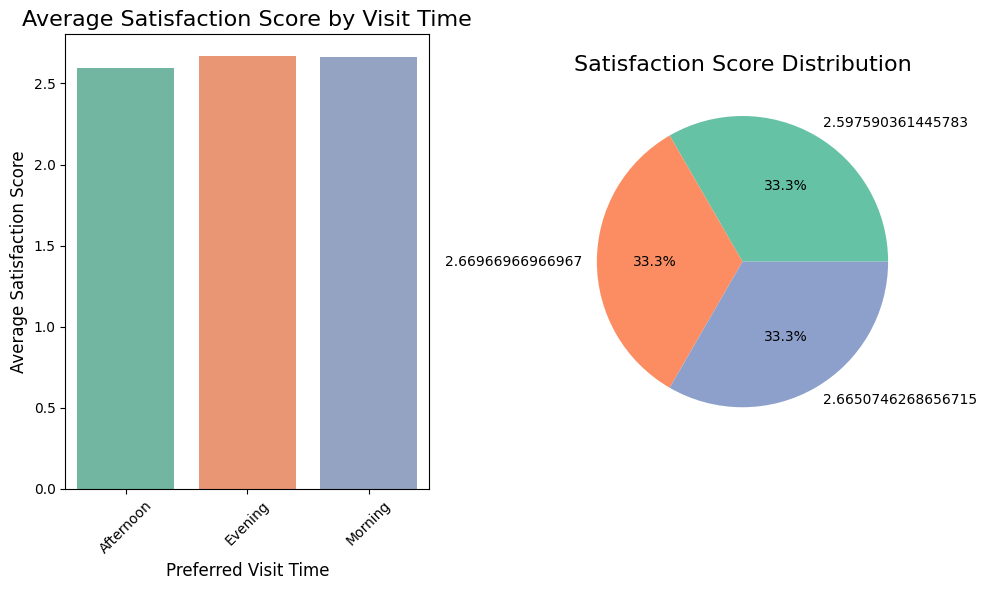

In [51]:
#Bar plot and pie plot depicting visit times trends influence on Satisfaction scores.

Visit_time_satisfaction = df.groupby('Preferred Visit Time')['Satisfaction Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(Visit_time_satisfaction))
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

sns.barplot(x='Preferred Visit Time', y='Satisfaction Score', data=Visit_time_satisfaction, palette=palette, ax=axes[0])
axes[0].set_title('Average Satisfaction Score by Visit Time', fontsize=16)
axes[0].set_xlabel('Preferred Visit Time', fontsize=12)
axes[0].set_ylabel('Average Satisfaction Score', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)


loyalty_counts = Visit_time_satisfaction['Satisfaction Score'].value_counts()
axes[1].pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(loyalty_counts)))
axes[1].set_title('Satisfaction Score Distribution', fontsize=16)

plt.tight_layout()
plt.show()



> No distinct patterns are visible. In short, visit times **don't seem to effect** the Satisfaction score much.



<ipython-input-52-a5e1f642fa8a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Satisfaction Score', data=Gender_Satisfaction, palette=palette, ax=axes[0])


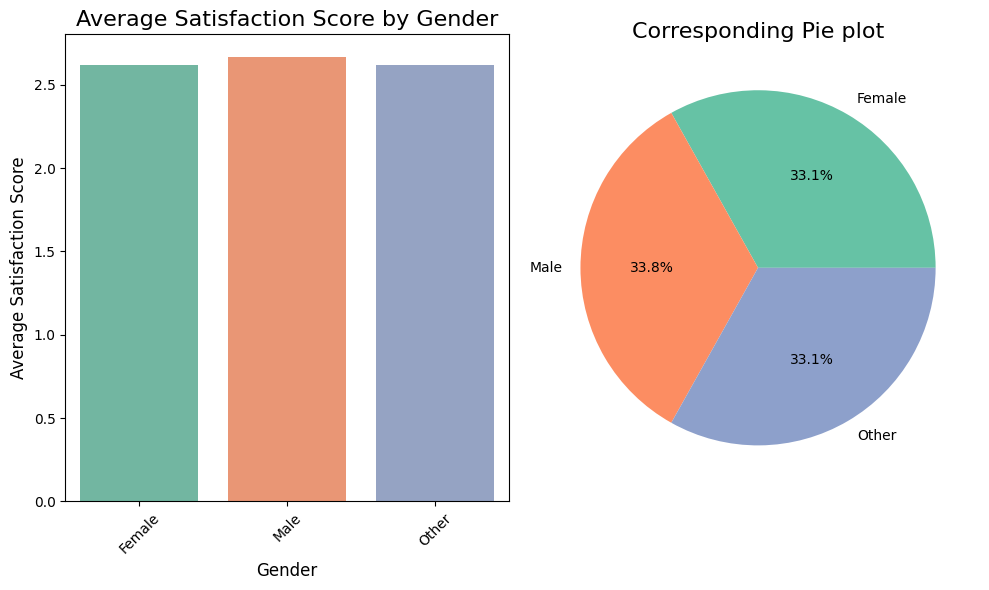

In [52]:
#Checking whether there exist any gender specific trends for Satisfaction scores

Gender_Satisfaction = df.groupby('Gender')['Satisfaction Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(Gender_Satisfaction))
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Barplot
sns.barplot(x='Gender', y='Satisfaction Score', data=Gender_Satisfaction, palette=palette, ax=axes[0])
axes[0].set_title('Average Satisfaction Score by Gender', fontsize=16)
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Average Satisfaction Score', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
Gender_Satisfaction['Satisfaction Score'] = Gender_Satisfaction['Satisfaction Score'].round(2)
axes[1].pie(Gender_Satisfaction['Satisfaction Score'], labels=Gender_Satisfaction['Gender'], autopct='%1.1f%%', colors=palette)
axes[1].set_title('Corresponding Pie plot', fontsize=16)

plt.tight_layout()
plt.show()

No significant trends are visible; though comparatively **women** have low satisfaction scores.

<ipython-input-53-d911857fbbde>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_satisfaction = df.groupby('Age Group')['Satisfaction Score'].mean().reset_index()
<ipython-input-53-d911857fbbde>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Satisfaction Score', data=Age_satisfaction, palette=palette)


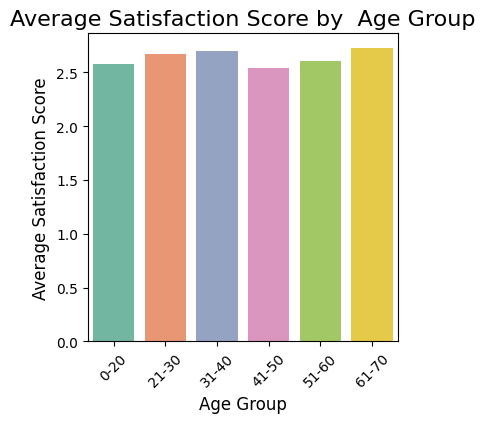

In [53]:
#Age Group and Satisfaction warranty extension_ bar plot

Age_satisfaction = df.groupby('Age Group')['Satisfaction Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(Age_satisfaction))

plt.figure(figsize=(4,4))
sns.barplot(x='Age Group', y='Satisfaction Score', data=Age_satisfaction, palette=palette)

plt.title('Average Satisfaction Score by  Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()



*    Customers of age **above 60** were more satisfied followed by those in their 30s and 20s.
*   While, those **in thier 40s** were **least satisfied**.



<ipython-input-54-bb0a39f32f60>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Warranty Extension', y='Satisfaction Score', data=Warrenty_satisfaction, palette=palette)


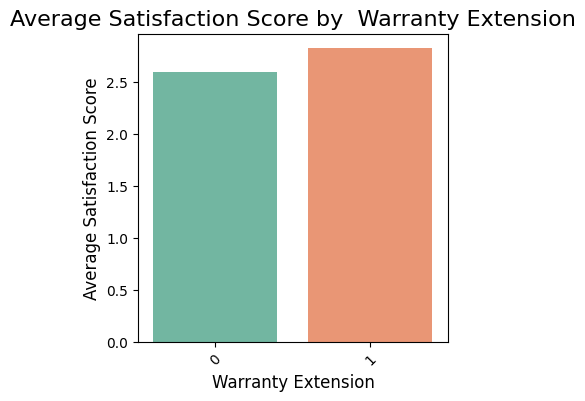

In [54]:
#Warranty Extension and Satisfaction warranty extension_ bar plot

Warrenty_satisfaction = df.groupby('Warranty Extension')['Satisfaction Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(Warrenty_satisfaction))

plt.figure(figsize=(4,4))
sns.barplot(x='Warranty Extension', y='Satisfaction Score', data=Warrenty_satisfaction, palette=palette)

plt.title('Average Satisfaction Score by  Warranty Extension', fontsize=16)
plt.xlabel('Warranty Extension', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()



> Those who **have a warranty extension** are **more satisfied** than those who haven't had an extension.



<ipython-input-55-d71f3948e740>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Membership Status', y='Satisfaction Score', data=Membership_Satisfaction, palette=palette)


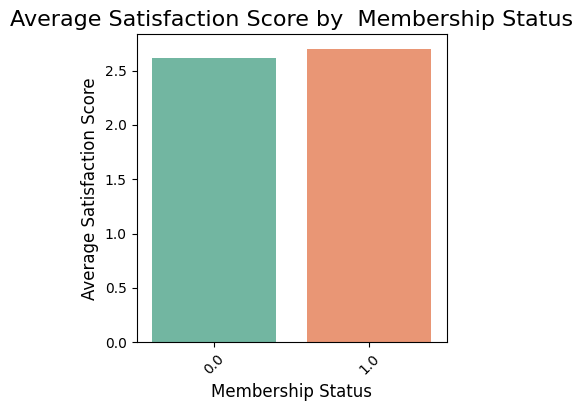

In [55]:
#Membership status and Satisfaction scores_ bar plot

Membership_Satisfaction = df.groupby('Membership Status')['Satisfaction Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(Membership_Satisfaction))

plt.figure(figsize=(4,4))
sns.barplot(x='Membership Status', y='Satisfaction Score', data=Membership_Satisfaction, palette=palette)

plt.title('Average Satisfaction Score by  Membership Status', fontsize=16)
plt.xlabel('Membership Status', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Those who **have a membership** seem **more satisfied**.


<ipython-input-56-dcccd83bffed>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment Method', y='Satisfaction Score', data=pay_option_satisfaction, palette=palette)


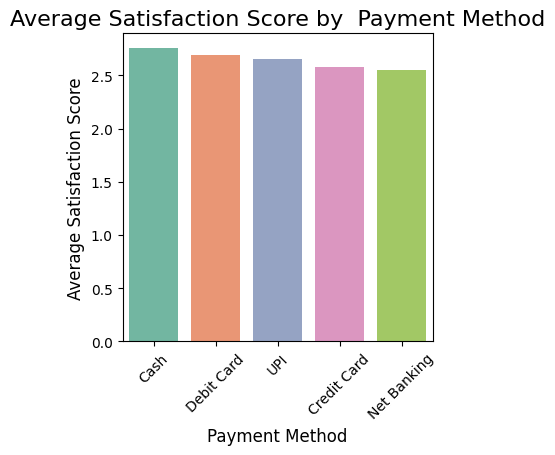

In [56]:
#Payment Method and Satisfaction pay_option bar plot

pay_option_satisfaction = df.groupby('Payment Method')['Satisfaction Score'].mean().reset_index()
pay_option_satisfaction = pay_option_satisfaction.sort_values(by='Satisfaction Score', ascending=False)
palette = sns.color_palette("Set2", len(pay_option_satisfaction))

plt.figure(figsize=(4,4))
sns.barplot(x='Payment Method', y='Satisfaction Score', data=pay_option_satisfaction, palette=palette)

plt.title('Average Satisfaction Score by  Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()

No significant influence is evident; though

*   Customers who use **cash and debit card** seem to have **high Satisfaction scores.**
*   Customers pay by **net banking** are **least** satisfied.



No distinct differences are seen for membres and non members. Though members have a slight higher loyalty and satisfaction scores.

<ipython-input-57-93e0faa597da>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Satisfaction Score', data=Region_Satisfaction, palette=palette)


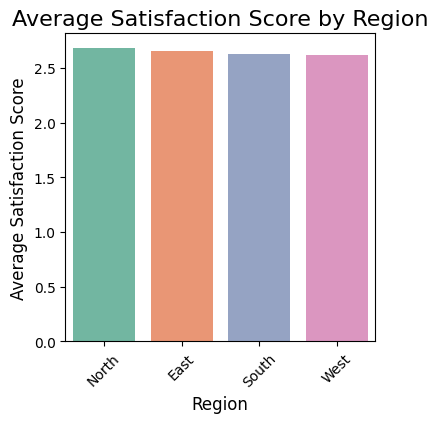

In [57]:
# analysing customers region and their Satisfaction

Region_Satisfaction = df.groupby('Region')['Satisfaction Score'].mean().reset_index()
Region_Satisfaction = Region_Satisfaction.sort_values(by='Satisfaction Score', ascending=False)
palette = sns.color_palette("Set2", len(Region_Satisfaction))

plt.figure(figsize=(4,4))
sns.barplot(x='Region', y='Satisfaction Score', data=Region_Satisfaction, palette=palette)

plt.title('Average Satisfaction Score by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()

No major differences are observable. Yet

*   People from **North** are comparatively **more satisfied**

*   While, customers from  **south** tend to be **less satisfied**.





In [58]:
df['Product Category'].value_counts(ascending=False)

,count
Product Category,
Accessories,1015
Laptop,1013
Tablet,997
Television,991
Mobile,984


<ipython-input-59-5a6247d8acf3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Satisfaction Score', data=product_satisfacton, palette=palette)


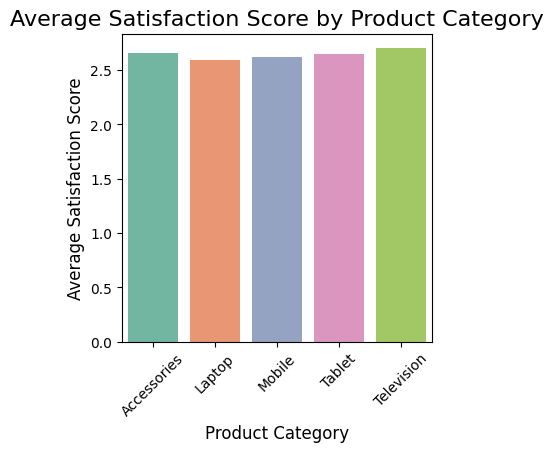

In [59]:

#Bar plot illustrating Product Category and Satisfaction score relationship.

product_satisfacton = df.groupby('Product Category')['Satisfaction Score'].mean().reset_index()
palette = sns.color_palette("Set2", len(product_satisfacton))

plt.figure(figsize=(4,4))
sns.barplot(x='Product Category', y='Satisfaction Score', data=product_satisfacton, palette=palette)

plt.title('Average Satisfaction Score by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Satisfaction Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()



> No significant variations are observable. Even though, comparatively **Laptop and Mobile buyers** seem to have lesser Satisfaction Scores than the other three item buyers.



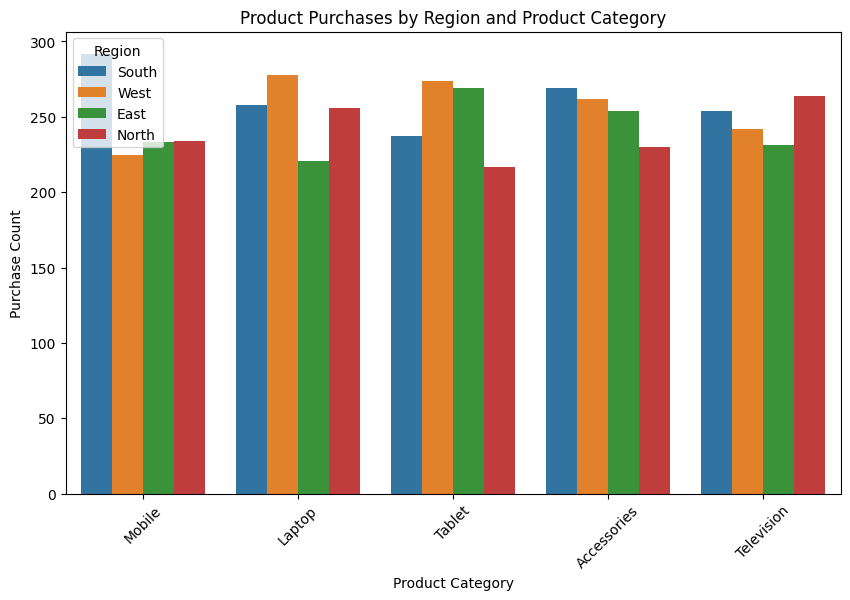

In [60]:
# Influence of Region and product category on the sales count

region_product_data = df.groupby(['Region', 'Product Category']).size().reset_index(name='Purchase Count')
region_product_data = region_product_data.sort_values(by='Purchase Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Purchase Count', hue='Region', data=region_product_data)
plt.title('Product Purchases by Region and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45)
plt.show()



*   Mobile phones are the most purchased item and higher number of purchases came from the south.

*   Individual minimum is for Tablet by customers from North.


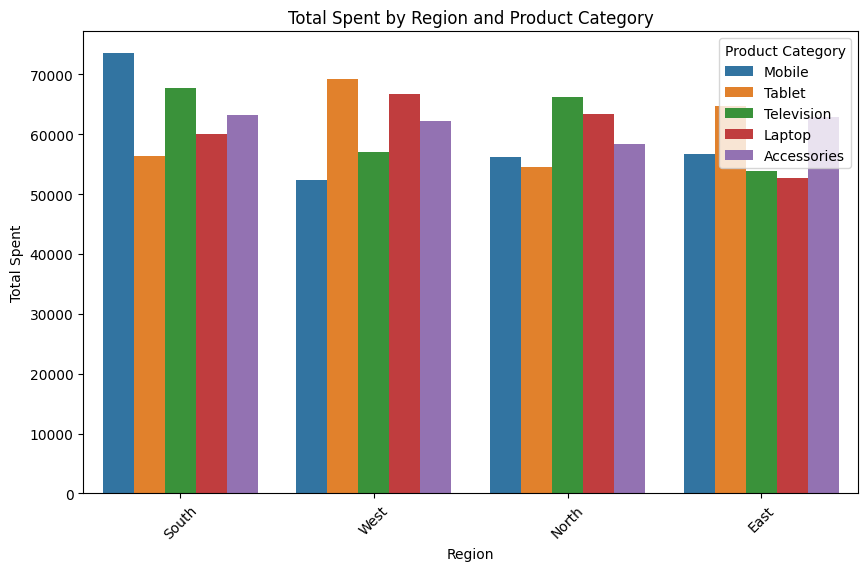

In [61]:
# Region and total spending

region_Spent_data = df.groupby(['Region', 'Product Category'])['Total Spent'].sum().reset_index(name='Total Spent')
region_Spent_data = region_Spent_data.sort_values(by='Total Spent', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Total Spent', hue='Product Category', data=region_Spent_data)
plt.title('Total Spent by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Total Spent')
plt.xticks(rotation=45)
plt.show()




> Customers from south spent the most, which was on mobile phones.



In [62]:
segmentation = df.groupby(['Region', 'Product Category']).agg(
    avg_satisfaction_score=('Satisfaction Score', 'mean'),
    avg_loyalty_score=('Loyalty Score', 'mean'),
    total_spent=('Total Spent', 'sum'),
    avg_discount=('Discount (%)', 'mean'),
    total_items_purchased=('Items Purchased', 'sum')
).reset_index()
segmentation = segmentation.sort_values(by='avg_loyalty_score', ascending=False)

print(segmentation)

   Region Product Category  avg_satisfaction_score  avg_loyalty_score  \
14  South       Television                2.807087          16.692913   
0    East      Accessories                2.744094          16.625984   
8   North           Tablet                2.746544          16.405530   
19   West       Television                2.760331          16.061983   
5   North      Accessories                2.686957          16.034783   
9   North       Television                2.659091          15.958333   
1    East           Laptop                2.696833          15.855204   
7   North           Mobile                2.658120          15.790598   
18   West           Tablet                2.602190          15.718978   
3    East           Tablet                2.639405          15.676580   
13  South           Tablet                2.624473          15.464135   
6   North           Laptop                2.667969          15.453125   
10  South      Accessories                2.620818 

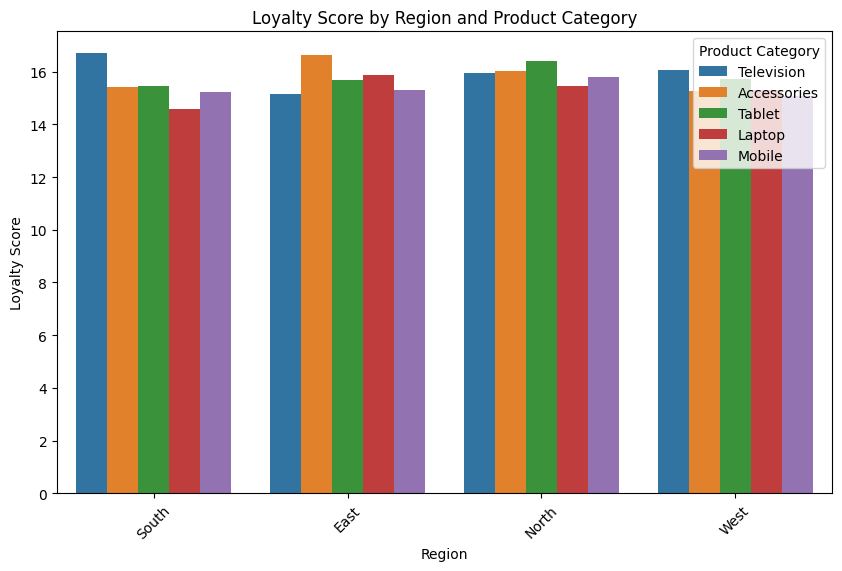

In [63]:
region_loyalty_data = df.groupby(['Region', 'Product Category'])['Loyalty Score'].mean().reset_index(name='Loyalty Score')
region_loyalty_data = region_loyalty_data.sort_values(by='Loyalty Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Loyalty Score', hue='Product Category', data=region_loyalty_data)
plt.title('Loyalty Score by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Loyalty Score')
plt.xticks(rotation=45)
plt.show()

For **each unique combination** of Region and Product Category, the mean Loyalty Score is calculated.
The plot provides insights into how Loyalty Score varies across both regions and product categories.


*   For this case south comes first with customers who bought television.(This specific combination)
*   But in a broader perspective, when we consider region only, north tops the list.



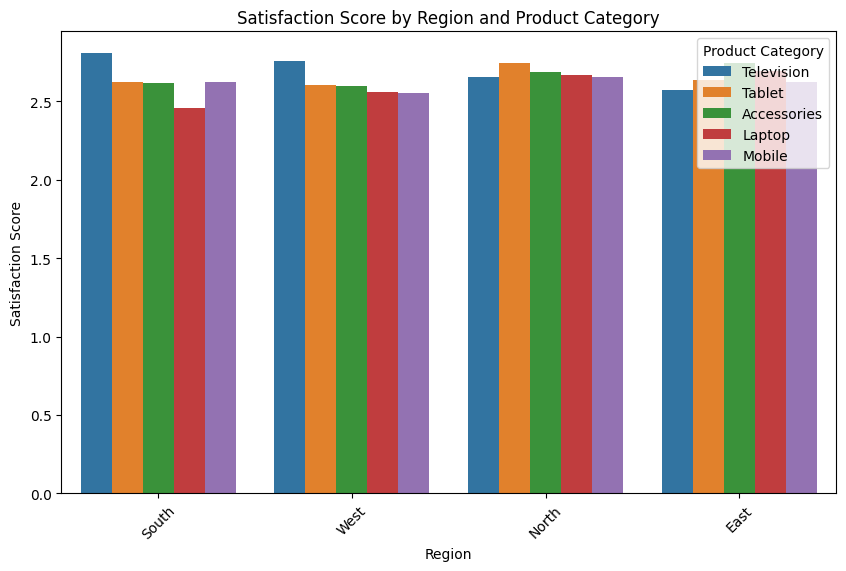

In [64]:
region_Satisfaction_data = df.groupby(['Region', 'Product Category'])['Satisfaction Score'].mean().reset_index(name='Satisfaction Score')
region_Satisfaction_data = region_Satisfaction_data.sort_values(by='Satisfaction Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Satisfaction Score', hue='Product Category', data=region_Satisfaction_data)
plt.title('Satisfaction Score by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45)
plt.show()

* In general, no significant differences are observable in the Satisfaction levels of western and northern people except for TV purchase and Tablet purchase respectively.  

*   Southern and western people were more satisfied with Television purchases while people from North were satisfied more about their tablet purchase.
*   On the other hand, customers from east were satisfied more about their accessories and laptop purchase.

*   Least of all satisfied were the customers who were from south and bought laptop followed by Eastern people who bought Television.






# Box plots and Outliers

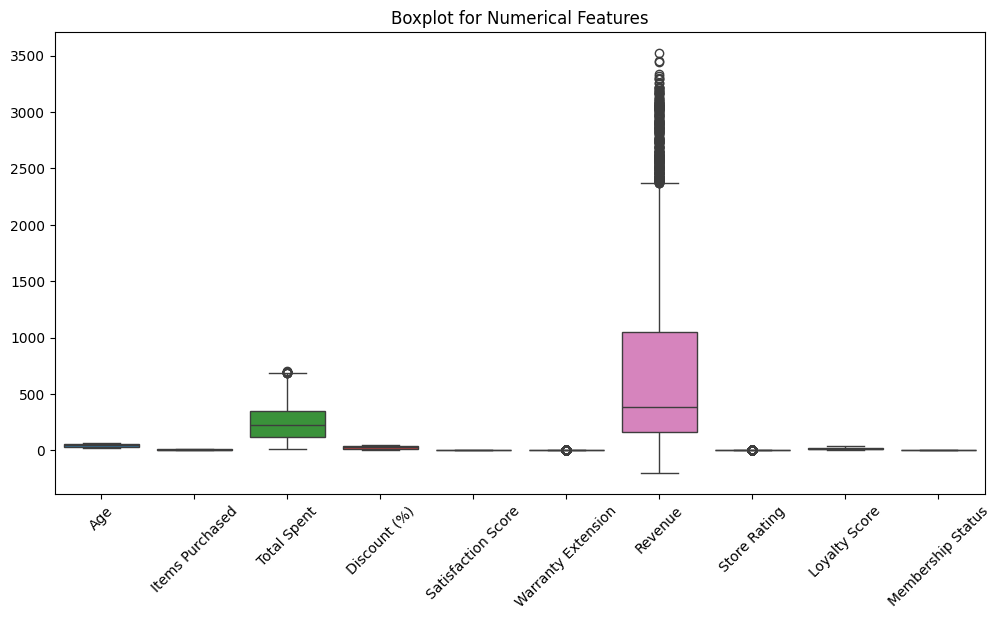

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(data=num_df)
plt.title('Boxplot for Numerical Features')
plt.xticks(rotation=45)
plt.show()

Outliers are present in columns such as Total spent and Revenue.

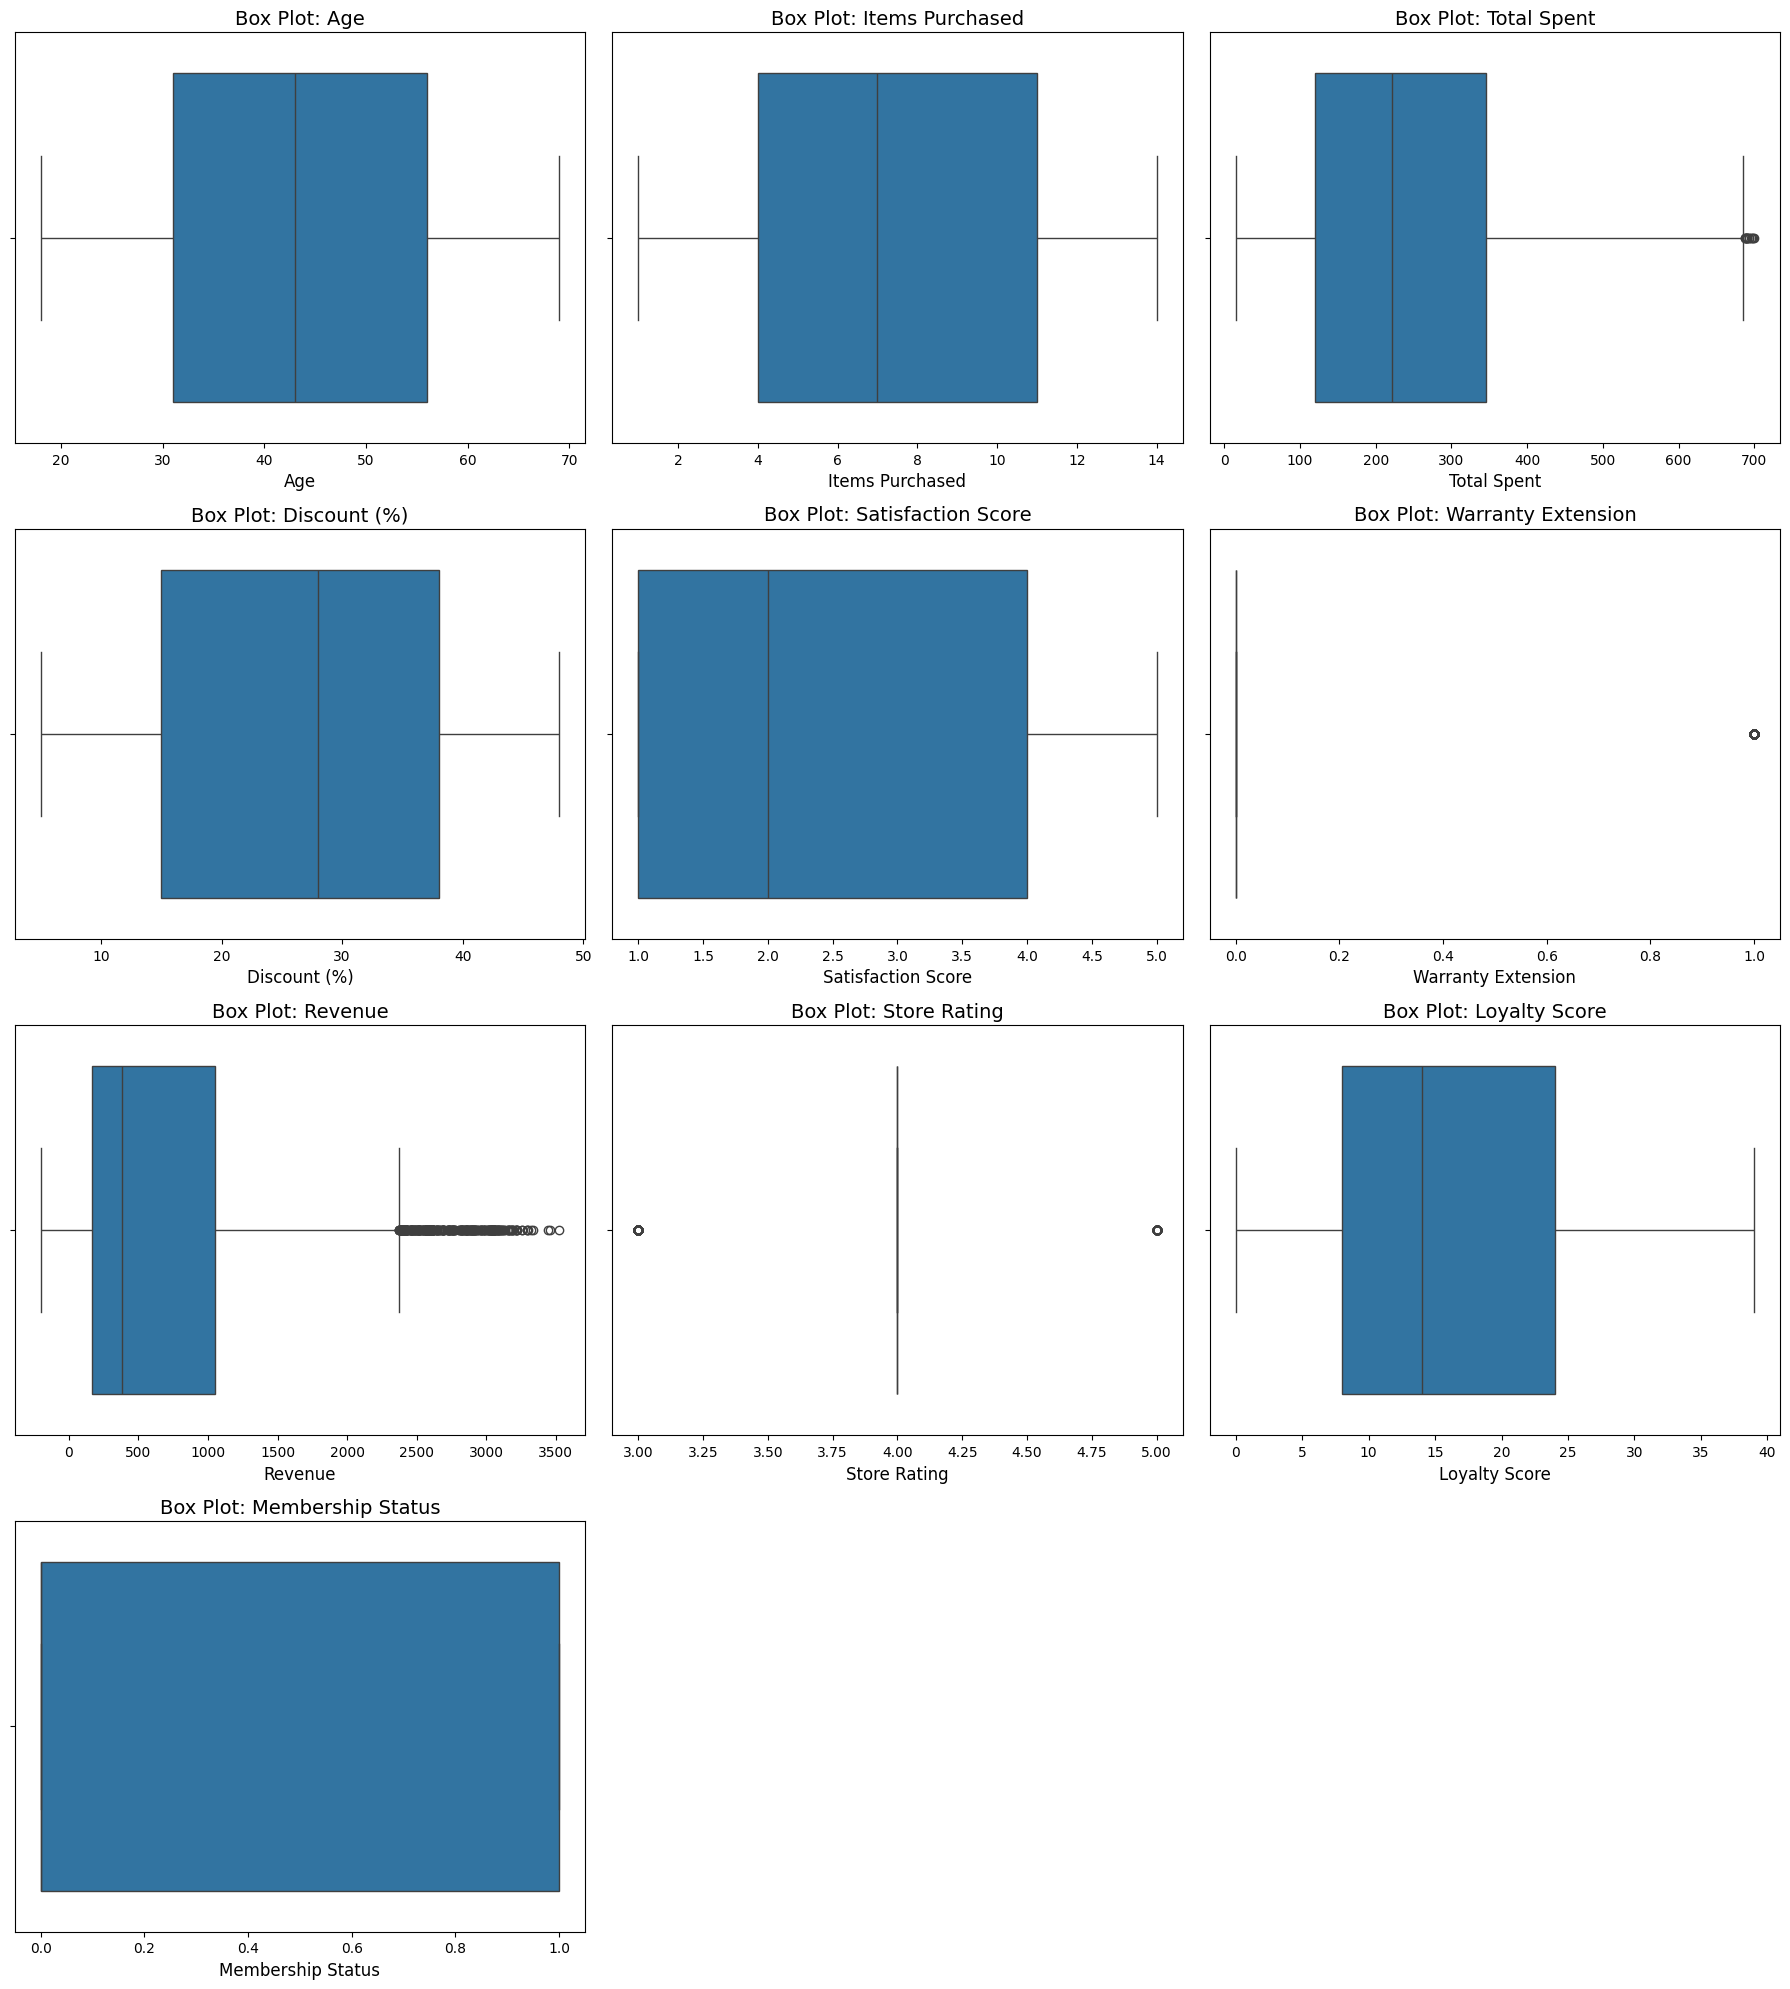

In [66]:
numerical_columns = num_df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = (len(numerical_columns) // n_cols) + 1

plt.figure(figsize=(18, n_rows * 5))
for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=num_df[col])
    plt.title(f'Box Plot: {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()


In [67]:
Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR)))

for column in num_df.columns:
    outliers = num_df[column][outliers_iqr[column]]
    if not outliers.empty:
        print(f"Outliers in '{column}':")
        print(outliers)
        print("\n")


Outliers in 'Total Spent':
205     693.42
385     690.20
432     695.41
556     690.57
786     696.49
796     699.61
949     689.15
2131    688.28
2319    688.25
2502    697.85
2930    690.43
3155    693.14
4500    687.28
Name: Total Spent, dtype: float64


Outliers in 'Warranty Extension':
0       1
1       1
2       1
7       1
15      1
       ..
4967    1
4971    1
4988    1
4994    1
4998    1
Name: Warranty Extension, Length: 1102, dtype: int64


Outliers in 'Revenue':
4       2463.59
6       2402.37
25      2551.92
46      2593.13
60      3061.79
         ...   
4903    3010.91
4939    2581.67
4952    2881.42
4964    2520.10
4979    2615.52
Name: Revenue, Length: 301, dtype: float64


Outliers in 'Store Rating':
5       5
9       5
24      3
25      5
29      3
       ..
4807    3
4852    3
4895    3
4940    3
4977    5
Name: Store Rating, Length: 218, dtype: int64






> All the **outliers** present here seem to be **genuine**. Therefore, **not** going to **remove** them.



# Heat map of Correlation matrix

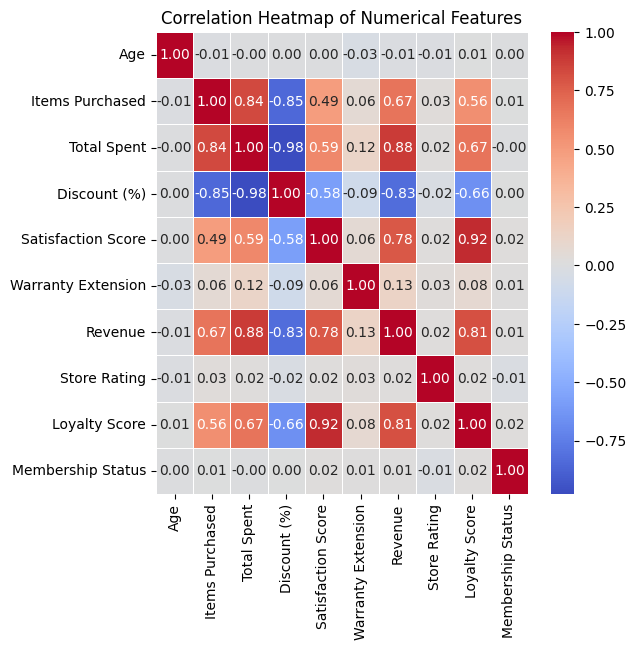

In [68]:
correlation_matrix = num_df.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()



*   **Discount** and **Total spent** columns have **high negative correlation** (**-0.98**) , which means as one entity increses other experience a corresponding decline.

*  The target column '**Satisaction Score**' has a **high positive** correlation (**0.92**) with **loyalty Score**. That is, as Satisfaction Score increases, loyalty score also witness an hike and vice versa.

* **Revenue** and **Total spent** columns have **high positive** correlation of **0.88**.

*   **Items purchased** and **discount** columns have a **negative** correlation of **-0.85** and that will cause a decline in the number of items purchased, as the discount percentage increses and vice versa.

*   **Total spent** and **Items purchased** columns have a **positive** correlation of **0.84** and results in an increse in total spent amount as items purchases increases and vice versa.

*   **Revenue** and **discount** columns have a **negative** correlation of **-0.83**; which implies as one quantity increases other quantity decreases.








In [69]:
target_column = 'Satisfaction Score'
correlation_with_target = num_df.corr()[target_column]

sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)
print("Correlation of all features with Satisfaction Score (Target Column):\n")
print(sorted_correlation)


Correlation of all features with Satisfaction Score (Target Column):

Satisfaction Score    1.000000
Loyalty Score         0.924820
Revenue               0.777023
Total Spent           0.589088
Discount (%)          0.581693
Items Purchased       0.487274
Warranty Extension    0.061952
Membership Status     0.023428
Store Rating          0.020413
Age                   0.001342
Name: Satisfaction Score, dtype: float64




> Loyalty Score, Revenue, Total Spent, Discount, Items Purchased are the highly correlated (numerical) with the target variable.


> Store Rating and Age are comparatively less correlated.






# Feature Engineering

In [70]:
df['Spent per Item'] = (df['Total Spent'] / df['Items Purchased']).round(2)

In [71]:
df['Spent per Item'].value_counts(ascending=False)

,count
Spent per Item,
38.70,7
32.61,7
49.16,7
15.32,6
26.22,6
...,...
49.34,1
41.07,1
45.10,1


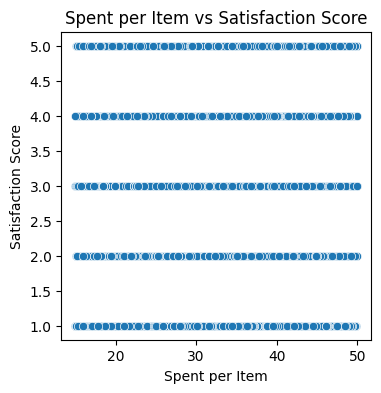

In [72]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Spent per Item', y='Satisfaction Score', data=df)
plt.title('Spent per Item vs Satisfaction Score')
plt.xlabel('Spent per Item')
plt.ylabel('Satisfaction Score')
plt.show()



> No distinct trend is seen for total spent and Satisfaction score in scatter plot.



In [73]:
df['Net Revenue'] = df['Total Spent'] - (df['Total Spent'] * df['Discount (%)'] / 100)

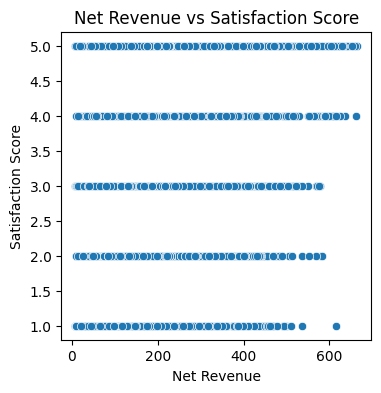

In [74]:
plt.figure(figsize=(4,4))
sns.scatterplot(x='Net Revenue', y='Satisfaction Score', data=df)
plt.title('Net Revenue vs Satisfaction Score')
plt.xlabel('Net Revenue')
plt.ylabel('Satisfaction Score')
plt.show()

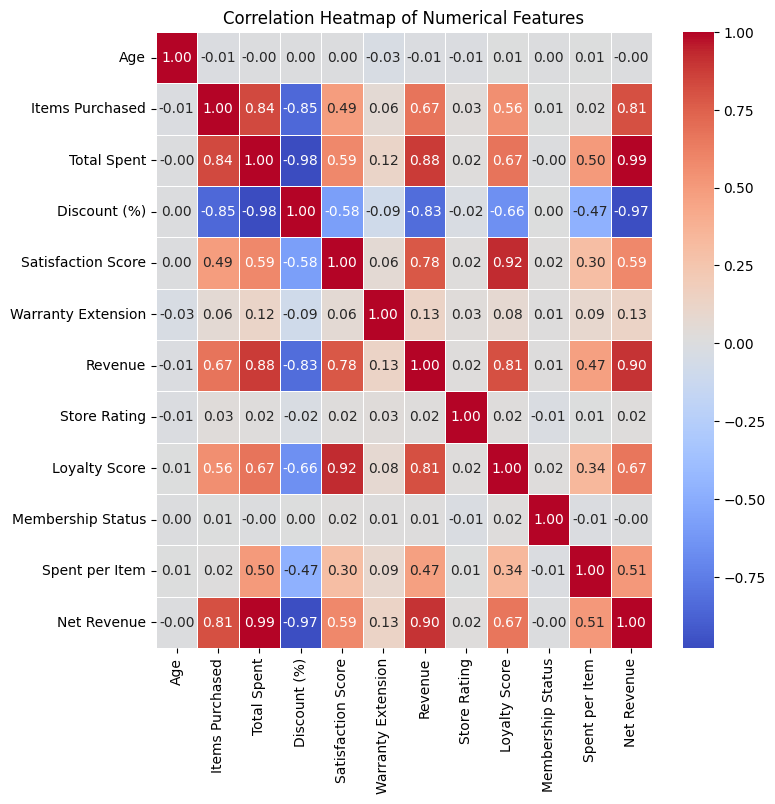

In [75]:
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [76]:
df=df.drop(['Age Group'],axis=1) #no longer needed.

# Encoding

**One-Hot Encoding**

In [77]:
cat_df=df.select_dtypes(include=['object'])
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                5000 non-null   object
 1   Region                5000 non-null   object
 2   Product Category      5000 non-null   object
 3   Payment Method        5000 non-null   object
 4   Preferred Visit Time  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [78]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = encoder.fit_transform(cat_df)
encoded_columns = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_df.columns))
df = pd.concat([df.drop(columns=cat_df.columns), encoded_columns], axis=1)




> One-hot encoding was applied to convert **non-ordinal categorical variables into numerical form**, enabling the machine learning model to process them effectively. To prevent the model from misinterpreting categorical relationships and to **reduce feature dimensionality**, the **drop='first'** argument was included, removing the first category and representing it implicitly through the other binary columns.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           5000 non-null   int64  
 1   Items Purchased               5000 non-null   int64  
 2   Total Spent                   5000 non-null   float64
 3   Discount (%)                  5000 non-null   int64  
 4   Satisfaction Score            5000 non-null   int64  
 5   Warranty Extension            5000 non-null   int64  
 6   Revenue                       5000 non-null   float64
 7   Store Rating                  5000 non-null   int64  
 8   Loyalty Score                 5000 non-null   int64  
 9   Membership Status             5000 non-null   float64
 10  Spent per Item                5000 non-null   float64
 11  Net Revenue                   5000 non-null   float64
 12  Gender_Male                   5000 non-null   float64
 13  Gen

# Splitting the dataset into Features and Target

In [80]:
X=df.drop('Satisfaction Score',axis=1) #features
y=df['Satisfaction Score'] #target variable



> **X (Features)**: These are the columns in the dataset that represent the **input** variables. The features contain the data that the model will use to learn and make predictions.

> **y (Target)**: This is the **output** variable that we aim to predict.


# Feature Elimination using VIF.

In [81]:
#checking multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

feature_names = X.columns

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                         Feature         VIF
0                            Age    9.518583
1                Items Purchased   80.402714
2                    Total Spent  995.337535
3                   Discount (%)   77.228806
4             Warranty Extension    1.331448
5                        Revenue   22.757862
6                   Store Rating  245.679828
7                  Loyalty Score   14.398994
8              Membership Status    1.450322
9                 Spent per Item   64.660328
10                   Net Revenue  541.470787
11                   Gender_Male    2.037215
12                  Gender_Other    1.080420
13                  Region_North    2.031186
14                  Region_South    2.106825
15                   Region_West    2.070245
16       Product Category_Laptop    2.004606
17       Product Category_Mobile    1.978321
18       Product Category_Tablet    1.986324
19   Product Category_Television    1.983390
20    Payment Method_Credit Card    2.001944
21     Pay

In [82]:
X=X.drop(['Net Revenue','Store Rating','Total Spent','Discount (%)','Revenue','Spent per Item'],axis=1)


> To address multicollinearity, we calculated the Variance Inflation Factor (VIF) for all features. Features with VIF values exceeding 7 were removed as they indicated **strong multicollinearity**. This elimination will **reduce redundancy, improved model interpretability**, and **ensures the stability of predictions**.



In [83]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                         Feature       VIF
0                            Age  6.706823
1                Items Purchased  6.321607
2             Warranty Extension  1.280659
3                  Loyalty Score  5.600410
4              Membership Status  1.430318
5                    Gender_Male  1.982315
6                   Gender_Other  1.072300
7                   Region_North  1.896717
8                   Region_South  1.959585
9                    Region_West  1.915731
10       Product Category_Laptop  1.811497
11       Product Category_Mobile  1.797921
12       Product Category_Tablet  1.786440
13   Product Category_Television  1.790624
14    Payment Method_Credit Card  1.833726
15     Payment Method_Debit Card  1.799202
16    Payment Method_Net Banking  1.825777
17            Payment Method_UPI  1.780593
18  Preferred Visit Time_Evening  1.902117
19  Preferred Visit Time_Morning  1.908125


# Train_Test_split

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)



> This step of split is to **divide the dataset** into **training and testing** sets, allowing the **model to learn from one portion** of the data and be **evaluated on another**, **unseen portion**. This ensures that the model is not overfitting to the training data and can generalize well to new, unseen data. By doing this, we also simulate real-world scenarios where the model encounters data it has not seen before, improving its robustness and performance.



# Scaling

**Standard Scaler**

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)



> Standard Scaler scales the features so that they all have a mean of 0 and a standard deviation of 1. This helps the model perform better by making sure **all features are on the same scale.**


# Model Building and Evaluation.


**Logistic Regression**

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,f1_score,accuracy_score,precision_score,recall_score

model = LogisticRegression(C=0.001, penalty='l2', multi_class='ovr',random_state=42)
model.fit(X_train, y_train)
y_pred_lr=model.predict(x_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nF1 Score:", f1_score(y_test, y_pred_lr,average = 'weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr,average = 'weighted' ))
print("Recall:", recall_score(y_test, y_pred_lr,average = 'weighted'))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[364   0   0   0   0]
 [159   0   0   0   0]
 [151   0   0   0   0]
 [121   0   0   0   0]
 [205   0   0   0   0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.36      1.00      0.53       364
           2       0.00      0.00      0.00       159
           3       0.00      0.00      0.00       151
           4       0.00      0.00      0.00       121
           5       0.00      0.00      0.00       205

    accuracy                           0.36      1000
   macro avg       0.07      0.20      0.11      1000
weighted avg       0.13      0.36      0.19      1000


F1 Score: 0.1942756598240469
Accuracy: 0.364
Precision: 0.132496
Recall: 0.364


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**KNeighborsClassifier**

In [87]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred_knn = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nF1 Score:", f1_score(y_test, y_pred_knn,average = 'weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn,average = 'weighted' ))
print("Recall:", recall_score(y_test, y_pred_knn,average = 'weighted'))

Confusion Matrix:
 [[328  29   7   0   0]
 [ 81  44  29   5   0]
 [  9  35  75  29   3]
 [  0   5  36  41  39]
 [  0   2   8  19 176]]

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.90      0.84       364
           2       0.38      0.28      0.32       159
           3       0.48      0.50      0.49       151
           4       0.44      0.34      0.38       121
           5       0.81      0.86      0.83       205

    accuracy                           0.66      1000
   macro avg       0.58      0.57      0.57      1000
weighted avg       0.64      0.66      0.65      1000


F1 Score: 0.6471755386632734
Accuracy: 0.664
Precision: 0.6378072758967452
Recall: 0.664


**GaussianNB**

In [88]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_nb = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("\nF1 Score:", f1_score(y_test, y_pred_nb,average = 'weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb,average = 'weighted' ))
print("Recall:", recall_score(y_test, y_pred_nb,average = 'weighted'))

Confusion Matrix:
 [[311  48   4   1   0]
 [ 62  59  32   6   0]
 [  5  26  83  27  10]
 [  0   2  36  39  44]
 [  0   1   7  21 176]]

Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.85      0.84       364
           2       0.43      0.37      0.40       159
           3       0.51      0.55      0.53       151
           4       0.41      0.32      0.36       121
           5       0.77      0.86      0.81       205

    accuracy                           0.67      1000
   macro avg       0.59      0.59      0.59      1000
weighted avg       0.65      0.67      0.66      1000


F1 Score: 0.658597874454219
Accuracy: 0.668
Precision: 0.6528953130657822
Recall: 0.668


**DecisionTreeClassifier**

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nDecision Tree - Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\nDecision Tree - F1 Score (weighted):", f1_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree - Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree - Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Decision Tree - Recall:", recall_score(y_test, y_pred_dt, average='weighted'))


Decision Tree - Confusion Matrix:
 [[280  63  20   1   0]
 [ 62  53  36   8   0]
 [  9  29  62  43   8]
 [  0   6  30  51  34]
 [  0   0   6  51 148]]

Decision Tree - Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.77      0.78       364
           2       0.35      0.33      0.34       159
           3       0.40      0.41      0.41       151
           4       0.33      0.42      0.37       121
           5       0.78      0.72      0.75       205

    accuracy                           0.59      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.61      0.59      0.60      1000


Decision Tree - F1 Score (weighted): 0.5993490681253762
Decision Tree - Accuracy: 0.594
Decision Tree - Precision: 0.60672616428019
Decision Tree - Recall: 0.594


**RandomForestClassifier**

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(max_depth=30,min_samples_leaf=1,min_samples_split=2,n_estimators=100,class_weight= 'balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\nRandom Forest - F1 Score (weighted):", f1_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest - Recall:", recall_score(y_test, y_pred_rf, average='weighted'))


Random Forest - Confusion Matrix:
 [[327  29   8   0   0]
 [ 80  33  39   7   0]
 [ 10  18  86  24  13]
 [  0   1  31  45  44]
 [  0   1   5  16 183]]

Random Forest - Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.90      0.84       364
           2       0.40      0.21      0.27       159
           3       0.51      0.57      0.54       151
           4       0.49      0.37      0.42       121
           5       0.76      0.89      0.82       205

    accuracy                           0.67      1000
   macro avg       0.59      0.59      0.58      1000
weighted avg       0.64      0.67      0.65      1000


Random Forest - F1 Score (weighted): 0.6492487895512083
Random Forest - Accuracy: 0.674
Random Forest - Precision: 0.6417641730939984
Random Forest - Recall: 0.674


# **SVC**

The **SVC (Support Vector Classifier)** is a machine learning algorithm used for classification tasks. It finds the optimal hyperplane that separates different classes in the feature space. Using kernels (eg:linear,RBF), SVC can handle both linear and non-linear data. The C parameter controls the trade-off between model complexity and training data error, with a higher C potentially causing overfitting and a lower C leading to underfitting. SVC is ideal for high-accuracy classification problems with clear class boundaries.

In [91]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=0.001, decision_function_shape='ovr', random_state=42) #tuned parameters
model.fit(X_train, y_train)
y_pred_svm = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nF1 Score:", f1_score(y_test, y_pred_svm,average = 'weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm,average = 'weighted' ))
print("Recall:", recall_score(y_test, y_pred_svm,average = 'weighted'))

Confusion Matrix:
 [[333  26   5   0   0]
 [ 72  50  37   0   0]
 [  8  17  93  28   5]
 [  0   2  28  55  36]
 [  0   0   4  15 186]]

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.91      0.86       364
           2       0.53      0.31      0.39       159
           3       0.56      0.62      0.58       151
           4       0.56      0.45      0.50       121
           5       0.82      0.91      0.86       205

    accuracy                           0.72      1000
   macro avg       0.65      0.64      0.64      1000
weighted avg       0.70      0.72      0.70      1000


F1 Score: 0.7002232133993719
Accuracy: 0.717
Precision: 0.6971472878565705
Recall: 0.717


Out of all the models, **svc** performed the best with

*   F1 Score: 0.700

*   Accuracy: 0.717

*   Precision: 0.697

*   Recall: 0.717





# Overfitting Check

Overfitting happens when a model learns the noise in the training data, causing it to perform well on training data but poorly on new, unseen data. Checking for overfitting **ensures the model generalizes well and avoids memorizing the training data**. If there's a large gap between training and test performance, overfitting is likely.

In [92]:
from sklearn.model_selection import cross_val_score, cross_validate

model = SVC(kernel='linear', C=0.001, decision_function_shape='ovr', random_state=42)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_precision = precision_score(y_train, y_pred_train, average='weighted')
test_precision = precision_score(y_test, y_pred_test, average='weighted')
train_recall = recall_score(y_train, y_pred_train, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
train_f1 = f1_score(y_train, y_pred_train, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
cv_precision = cross_val_score(model, X_train, y_train, cv=5, scoring='precision_weighted')
cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring='recall_weighted')
cv_f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')

overfitting_check = [
    ("Training Accuracy", train_accuracy),
    ("Test Accuracy", test_accuracy),
    ("\nTraining Precision", train_precision),
    ("Test Precision", test_precision),
    ("\nTraining Recall", train_recall),
    ("Test Recall", test_recall),
    ("\nTraining F1 Score", train_f1),
    ("Test F1 Score", test_f1),
    ("\nCross-Validation Accuracy", cv_accuracy.mean()),
    ("Cross-Validation Precision", cv_precision.mean()),
    ("Cross-Validation Recall", cv_recall.mean()),
    ("Cross-Validation F1 Score", cv_f1.mean())
]


for metric, score in overfitting_check:
    print(f"{metric}: {score:.4f}")


Training Accuracy: 0.7105
Test Accuracy: 0.7170

Training Precision: 0.6894
Test Precision: 0.6971

Training Recall: 0.7105
Test Recall: 0.7170

Training F1 Score: 0.6950
Test F1 Score: 0.7002

Cross-Validation Accuracy: 0.7072
Cross-Validation Precision: 0.6859
Cross-Validation Recall: 0.7072
Cross-Validation F1 Score: 0.6906




> The **model** **does not appear to be overfitting** since the performance on both the training and test sets is consistent, and the cross-validation results corroborate this. There are no significant discrepancies between the metrics on the training set, test set, and cross-validation, suggesting the **model generalizes well to new, unseen data**.



# Further Feature Selection with Selected model.

**K-best Method**

The K-best method with f_classif is used for feature selection to identify the **top k features that have the highest relationship with the target variable.** The process involves using ANOVA F-tests to score the features based on their importance and selecting the best k features. By applying this method, we reduce the dimensionality of the dataset, improving the model's efficiency without sacrificing performance. This selection process helps in focusing on the most influential features, leading to better generalization and potentially avoiding overfitting.

In [93]:
from sklearn.feature_selection import SelectKBest, f_classif

svm_model = SVC(kernel='linear', C=0.001, decision_function_shape='ovr', random_state=42)
f1_scores = []

for k in range(1, len(X_train.columns) + 1):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    svm_model.fit(X_train_selected, y_train)
    y_pred = svm_model.predict(X_test_selected)

    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

    print(f'\nWith {k} features:')
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("F1 Score:", f1)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))


With 1 features:
Confusion Matrix:
 [[333  26   5   0   0]
 [ 72  45  42   0   0]
 [  8  15  92  31   5]
 [  0   2  28  55  36]
 [  0   0   3  16 186]]

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.91      0.86       364
           2       0.51      0.28      0.36       159
           3       0.54      0.61      0.57       151
           4       0.54      0.45      0.49       121
           5       0.82      0.91      0.86       205

    accuracy                           0.71      1000
   macro avg       0.64      0.63      0.63      1000
weighted avg       0.69      0.71      0.69      1000

F1 Score: 0.6927036162385075
Accuracy: 0.711
Precision: 0.6897346569855246
Recall: 0.711

With 2 features:
Confusion Matrix:
 [[333  26   5   0   0]
 [ 72  50  37   0   0]
 [  8  17  97  24   5]
 [  0   2  30  53  36]
 [  0   0   4  15 186]]

Classification Report:
               precision    recall  f1-score   support

           

**Number of best features or K**

In [94]:
best_k = np.argmax(f1_scores) + 1
print(f"\nBest number of features based on F1 Score: {best_k}")


Best number of features based on F1 Score: 3


**Name of Best Features**

In [95]:
feature_names = X_train.columns

k = 3
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)

selected_feature_mask = selector.get_support()
selected_features = feature_names[selected_feature_mask]
print(f"Selected Features (Top {k}): {selected_features.tolist()}")


Selected Features (Top 3): ['Items Purchased', 'Warranty Extension', 'Loyalty Score']


# Final SVC model with 3 features

In [96]:
selector = SelectKBest(score_func=f_classif, k=best_k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

svm_model.fit(X_train_selected, y_train)
y_pred = svm_model.predict(X_test_selected)

print("\nFinal Model Evaluation with Selected Features:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))


Final Model Evaluation with Selected Features:
Confusion Matrix:
 [[333  26   5   0   0]
 [ 72  50  37   0   0]
 [  8  17  97  24   5]
 [  0   3  29  53  36]
 [  0   0   4  15 186]]

Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.91      0.86       364
           2       0.52      0.31      0.39       159
           3       0.56      0.64      0.60       151
           4       0.58      0.44      0.50       121
           5       0.82      0.91      0.86       205

    accuracy                           0.72      1000
   macro avg       0.66      0.64      0.64      1000
weighted avg       0.70      0.72      0.70      1000

F1 Score: 0.7017901798475754
Accuracy: 0.719
Precision: 0.6991410921889837
Recall: 0.719




> 'Items Purchased', 'Warranty Extension', 'Loyalty Score' - only these 3 features are required to predict the Satisfaction Score with an accuracy of 0.71 and f1 score of 0.70.

